<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#데이터-불러오기" data-toc-modified-id="데이터-불러오기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>데이터 불러오기</a></span></li><li><span><a href="#전처리,-명사추출" data-toc-modified-id="전처리,-명사추출-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>전처리, 명사추출</a></span></li><li><span><a href="#문서검색" data-toc-modified-id="문서검색-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>문서검색</a></span></li><li><span><a href="#벡터화" data-toc-modified-id="벡터화-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>벡터화</a></span></li><li><span><a href="#유의어,-불용어-처리" data-toc-modified-id="유의어,-불용어-처리-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>유의어, 불용어 처리</a></span></li><li><span><a href="#군집화,-시각화" data-toc-modified-id="군집화,-시각화-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>군집화, 시각화</a></span><ul class="toc-item"><li><span><a href="#doc2cec" data-toc-modified-id="doc2cec-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>doc2cec</a></span></li></ul></li></ul></div>

In [1]:
import newsight

In [2]:
newsight.readme()

******Description*****
code by 현호킴, description by 승현백
클래스 이름.help() : 해당 클래스에서 사용할 수 있는 함수 출력
******Class names******
1) 데이터 불러오기 : Pickle2DF
2) 전처리 : PreprocessingText
3) 불용어,유의어 처리 : GetSimilarWords, GetStopWords
4) 문서 검색 :  GetDocsFromQuery
5) 벡터화 :  Vecterizer
6) 시각화 : Get2DPlot, AnalyzingNewsData
**********************


## 데이터 불러오기

In [3]:
newsight.Pickle2DF().help()

******Pickle2DF******
1) get_dataframe('피클 경로') : 피클을 데이터프레임으로 반환
2) get_dataframe_from_list('피클 경로를 저장한 리스트') : 피클여러개를 데이터프레임으로 구성된 리스트로 반환
**********************


In [4]:
data_loader = newsight.Pickle2DF()
df = data_loader.get_dataframe('data/미래에셋대우/rawdata_미래에셋대우.pickle')

In [5]:
df.head()

,date,title,content,date_tmp
0,2019-04-19,"NH투자證 `선택과 집중` 통했다…펀드설정액, 증권사 1위에 올라",지난해 말 조직개편을 통해 펀드 판매에 승부수를 띄운 NH투자증권이 올해 들어 금융...,737168
1,2019-04-19,"2차전지 기업들, 속속 '코스닥 입성' 채비","코윈테크, 8월 코스닥 상장 추진 \n \n \n[ 이우상 기자 ] 2차전지 생산용...",737168
2,2019-04-19,증시 호조에 증권株 `훨훨`…2분기 실적도 `맑음`,올해 들어 증시가 호조를 보이면서 증권주들이 1분기 양호한 성적표를 받아들었다. 이...,737168
3,2019-04-19,"한화 LifePlus TDF 설정 1년, 4% 대 운용성과 달성",한화 라이프플러스 상장지수펀드(ETF)의 수익률이 설정 이후 양호한 수익률을 올리고...,737168
4,2019-04-19,"미래에셋벤처투자의 사회적기업1호펀드, 72.4% 수익 올리고 청산돼",미래에셋벤처투자는 지난 2011년 42억원으로 결성했던 사회적기업1호펀드가 72.4...,737168


In [6]:
# 300개만 가져와서 테스트
import random
rand_idx = random.sample(range(10000),300)
df_2 = df.iloc[rand_idx]
df_2.shape

(300, 4)

## 전처리, 명사추출

In [7]:
preprocessor = newsight.PreprocessingText()
preprocessor.help()

d:\pl\python\python37\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


******PreprocessingText******
1) make_content_re('dataframe') : content 열 전처리 후, 'content_re'열에 저장
2) add_noun_dict('list') : 명사 사전에 단어 추가
3) add_stopwords('list') : 불용어 사전에 단어 추가
4) tokenize('dataframe') : 데이터 프레임에 'tokenized_doc' 열을 추가하고, 토큰화된 문서를 저장한다
*****************************


In [8]:
# 명사 추가
noun_list = ['그리고', '미래에셋','미래에셋대우','ibk']
preprocessor.add_noun_dict(noun_list)

추가한 명사
['그리고', '미래에셋', '미래에셋대우', 'ibk']


In [9]:
df_pre_1 = preprocessor.make_content_re(df_2) # 전처리

D:\document\뉴스중복기사제거프로젝트_190416\newsight.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['content_re'] = data['content'].apply(self.preprocessing)


In [10]:
df_pre_2 = preprocessor.tokenize(df_pre_1) # 명사 추출

추가한 명사: ['그리고', '미래에셋', '미래에셋대우', 'ibk']
불용어:  []


D:\document\뉴스중복기사제거프로젝트_190416\newsight.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data["tokenized_doc"] = tokenized_doc_without_stopwords


In [11]:
df_pre_2.head()

,date,title,content,date_tmp,content_re,tokenized_doc
2108,2019-01-14,"""대한항공, 실적 개선 사이클 진입…목표가 상향""<미래에셋대우>",[디지털타임스 김민주 기자] 미래에셋대우는 14일 대한항공에 대해 실적 개선 사이클...,737073,[디지털타임스 ] 미래에셋대우는 대한항공에 대해 실적 개선 사이클에 진입할 것이라...,"[디지털타임스, 미래에셋대우, 대한항공, 대해, 실적, 개선, 사이클, 진입, 것,..."
61,2019-04-17,박현주 `IT 선견지명` 통할까…클라우드컴퓨팅 ETF 美 상장,미래에셋자산운용의 미국 자회사 '글로벌X'가 클라우드컴퓨팅 기업에 투자하는 상장지수...,737166,미래에셋자산운용의 미국 자회사 글로벌X 가 클라우드컴퓨팅 기업에 투자하는 상장지수...,"[미래에셋, 자산운용, 미국, 자회사, 글로벌, 클라우드, 컴퓨팅, 기업, 투, 자..."
5122,2018-08-16,"[마켓인사이트]이수화학, 500억원어치 영구 CB 발행",설비 투자자금 조달 목적 \n주관사 신영증권 450억원 투자 \n \n \n ≪이 ...,736922,설비 투자자금 조달 목적 \n주관사 신영증권 억원 투자 \n \n \n ≪이 기사는...,"[설비, 투자자, 금, 조달, 목적, 주관, 사, 신영, 증권, 억원, 투자, 이,..."
3899,2018-10-23,"거래소, 금융취약층 지원방안 세미나 개최",[머니투데이 신아름 기자] 한국거래소 시장감시위원회는 23일 한국거래소 대회의실에서...,736990,"[머니투데이 ] 한국거래소 시장감시위원회는 한국거래소 대회의실에서 학계, 법조계,...","[머니투데이, 한국, 거래소, 시장, 감시, 위원회, 한국, 거래소, 회의실, 학계..."
7196,2018-05-30,[하반기 투자전략] 한치앞 안보이는 `안갯속 코스피`…글로벌·배당주 펀드로 넘어볼까,5월 말 무산될 뻔했던 미·북정상회담이 이틀 만에 다시 정상 궤도에 오르며 한국 증...,736844,말 무산될 뻔했던 미 북정상회담이 이틀 만에 다시 정상 궤도에 오르며 한국 증시도...,"[말, 무산, 북, 정상회담, 이틀, 다시, 정상, 궤도, 한국, 증시, 요동, 남..."


## 문서검색

In [27]:
doc_selector = newsight.GetDocsFromQuery()
doc_selector.help()

******GetDocsFromQuery******
1)set_query('검색어') : 검색어 설정 
2)select_news('토큰화된 문서 시리즈') : 검색어를 포함한 문서 시리즈 반환
*****************************


In [28]:
doc_selector.set_query('은행')

In [30]:
doc_selector.select_news(df_pre_2['tokenized_doc'])

length of selected news:  47
length of original data:  300


8405    [다음, 달, 물, 억원, 어치, 발행, 급격, 실적, 악화, 변수, 로, 작년, ...
5046    [수, 시장, 침체, 수출, 공장, 가동, 율, 로, 고요, 간제, 려고, 수, 상...
4831    [머니투데이, 편입, 비중, 업계, 비중, 증가, 뿐, 금융, 당국, 안정, 성, ...
5657    [미래에셋대우, 금융, 지주, 대해, 본격, 적, 저, 평가, 해소, 자산, 건전성...
1619    [머니투데이, 삼성, 바이오, 직스, 지난해, 기, 영업, 이익, 억원, 년, 동기...
424     [정태영, 현대, 카드, 부회장, 금융, 권, 현직, 최고경영자, 중, 지난해, 연...
3780    [머니투데이, 편집자, 주, 주식시장, 중, 무역, 갈등, 지속, 기준금리, 역전,...
1139    [최근, 새, 여명, 인원, 감축, 정년, 퇴직, 것, 희망, 퇴직, 자, 제시, ...
618     [개인, 투자자, 억원, 까운, 회사채, 매, 수하, 면서, 회사채, 투자, 관심,...
8894    [금융위, 금융, 개혁, 인터넷, 전문, 은행, 등, 달, 도입, 탄핵, 정국, 거...
5594    [대신, 증권, 광주, 은행, 대해, 상장, 폐, 지시, 까지, 금융, 주가, 연동...
7062    [머니투데이, 영업, 점, 통폐합, 후, 인력, 이탈, 사상, 최대, 이익, 불구,...
4024    [머니투데이, 적, 극적, 로, 사업, 포트폴리오, 변화, 성공, 미래에셋대우, 금...
9116    [역시, 주머니, 노래, 샤워, 부스, 마스카라, 대신, 눈, 힘, 주자, 요즘, ...
1085    [주식, 펀드, 채권, 등, 투자, 상품, 손익, 합산, 이익, 날, 때, 과세, ...
6575    [산업, 은행, 추진, 친환경, 사업, 녹색, 기후, 기금, 지원, 여부, 결정, ...
6329    [업종, 지수, 비교, 위험, 대비, 수익률, 수, 오후, 현재, 전일, 대비, 오...
3828    [억원, 모

## 벡터화

In [19]:
vectorizer = newsight.Vectorizer()
vectorizer.help()

******GetDocsFromQuery******
1)get_tfidf_vec('토큰화된 문서 시리즈','단어 수') : 문서를 tfidf 벡터(x) 와 단어(words)로 반환
2)get_doc2vec('토큰화된 문서 시리즈') : doc2vec 벡터 반환
3)load_doc2vec_model('토큰화된 문서 시리즈','모델객체이름') : 저장된 모델로  doc2vec 벡터 반환
*****************************


In [21]:
x,words = vectorizer.get_tfidf_vec(df_pre_2['tokenized_doc'],max_feat=1000) # tf idf

In [24]:
x_doc2vec = vectorizer.get_doc2vec(df_pre_2['tokenized_doc'])

corpus_count:  300
epoch:  0
epoch:  10
epoch:  20
epoch:  30
epoch:  40
Model Saved
Load Model


## 유의어, 불용어 처리

In [32]:
similar_words = newsight.GetSimilarWords()
similar_words.help()

******GetSimilarWords******
1) get_model('토큰화된 문서 시리즈','doc2vec 후 차원 크기') : doc2vec 모델 학습
2) get_similar_words('단어') : 유의어 출력
*****************************


In [33]:
similar_words.get_model(df_pre_2['tokenized_doc'],size = 300)

In [35]:
similar_words.get_similar_words('은행')

단어 : 유사도
예금 : 0.9190393686294556
민원 : 0.9029737710952759
당 : 0.8933926820755005
저축 : 0.8897323608398438
순이 : 0.888285756111145
기손 : 0.8882416486740112
입 : 0.8836761713027954
보증 : 0.8822344541549683
초대형 : 0.8796976804733276
수수료 : 0.8795653581619263


In [37]:
stop_words = newsight.GetStopWords()
stop_words.help()

******GetStopWords******
1)get_bow('토큰화된 문서 시리즈') : bow 생성
2)get_stop_words('단어 출현 빈도 순위  n ') : 단어 출현 빈도 상위 n 개, 하위 n 개 출력
*****************************


In [43]:
stop_words.get_bow(df_pre_2['tokenized_doc'])
stop_words.get_stop_words(10) # 출현 빈도 상위,하위 10위 단어 출력

의견
투자
목표
주가
증권
매수
유지
제시
것
적
닥
돈벌이
지문
비화
줄기
순조
중앙대
김덕규
이득
제비


## 군집화, 시각화

In [47]:
# tfidf 
cluster_tfidf = newsight.Get2DPlot(x)
cluster_tfidf.help()

아 난해하다 알아서 쓰세요


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
PCA DBSCAN


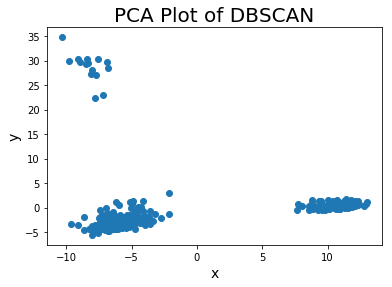

In [56]:
tfidf_2d = cluster_tfidf.get_2D_vec()
cluster_tfidf.get_cluster_labels()
cluster_tfidf.plot2D()

In [62]:
# 라벨 생성
clusters = sorted(list(set(cluster_tfidf.cluster_labels)))
new_data = df_pre_2.copy(deep = True)
new_data['labels'] = cluster_tfidf.cluster_labels

In [64]:
analyzer = newsight.AnalyzingNewsData()
analyzer.help()

******AnalyzingNewsData******
1)get_n_data_per_cluster('라벨 리스트') : 클러스터 별 문서 개수 반환
2)print_news_per_cluster('토큰화된 문서 시리즈','클러스터 라벨 리스트') : 클러스터 라벨별로 제목을 출력한다.
*****************************


In [73]:
## doc2vec
cluster_doc2vec = newsight.Get2DPlot(x_doc2vec)
cluster_doc2vec.help()

아 난해하다 알아서 쓰세요


[-1 -1 -1 -1 -1 -1  0  0  0  0 -1  0  0  0  0  0 -1 -1  0 -1 -1 -1 -1  0
  0 -1 -1  0  0  0  0  0  0  0  0 -1  1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  0 -1  0  0 -1  0  0  0  0 -1 -1 -1  0  0  0  0  0 -1  0 -1
 -1  0  0  0  0 -1 -1  0 -1  1  0 -1 -1 -1 -1  0 -1 -1  0  0  0  0  0  0
  0  0  0  0 -1  0 -1  2 -1 -1 -1 -1  0  2 -1  3 -1 -1 -1  0 -1  0 -1  0
  4  0  0  0  0  0  0 -1  0  0  1  0  0  0  0  0  0  0 -1  0  0  0 -1 -1
 -1  0  0  0 -1  0 -1 -1 -1  0  0  0  0 -1  0  0  0 -1  0 -1  5  0  0  0
 -1 -1  0  0  0 -1  0 -1  0  4 -1  0  0  0 -1 -1 -1  0  0  0  0  0  0 -1
 -1  0  0 -1 -1  0 -1 -1 -1 -1 -1  5 -1  0  0  0 -1 -1  0 -1  1  0  0  0
 -1 -1  0 -1 -1 -1 -1 -1  0 -1 -1  0  0 -1  0 -1 -1  0 -1  0  0  0 -1  0
 -1 -1  0  0 -1 -1 -1  0  0 -1  0 -1  0  0  0  0 -1  0  0  0  0  0 -1 -1
  0 -1  0 -1 -1 -1  3 -1  0  0 -1  0  0 -1 -1 -1  0 -1  0  0 -1  0  0 -1
 -1  0  0 -1  0  0 -1 -1  0 -1 -1 -1]
PCA DBSCAN


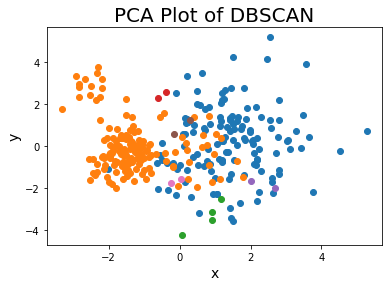

In [76]:
doc2vec_2D = cluster_doc2vec.get_2D_vec()
cluster_doc2vec.get_cluster_labels()
cluster_doc2vec.plot2D()